In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
sns.set_theme()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
#import scorecardpy as sc
from sklearn.model_selection import cross_val_score

In [132]:
df = pd.read_csv('Data/bank-additional-full.csv', delimiter= ';')

In [133]:
df_root = pd.read_csv('Data/bank-additional-full.csv', delimiter= ';')

In [134]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,1,999,1,failure,-0.1,93.2,-42.0,4.021,5195.8,no
1,30,admin.,single,university.degree,no,yes,yes,telephone,nov,fri,...,10,999,0,nonexistent,-0.1,93.2,-42.0,4.021,5195.8,no
2,52,technician,married,basic.9y,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.021,5195.8,no
3,31,admin.,single,high.school,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.2,-42.0,4.021,5195.8,no
4,49,admin.,married,high.school,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.021,5195.8,no


In [135]:
df.shape

(41235, 21)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41235 entries, 0 to 41234
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41235 non-null  int64  
 1   job             41235 non-null  object 
 2   marital         41235 non-null  object 
 3   education       41235 non-null  object 
 4   default         41235 non-null  object 
 5   housing         41235 non-null  object 
 6   loan            41235 non-null  object 
 7   contact         41235 non-null  object 
 8   month           41235 non-null  object 
 9   day_of_week     41235 non-null  object 
 10  duration        41235 non-null  int64  
 11  campaign        41235 non-null  int64  
 12  pdays           41235 non-null  int64  
 13  previous        41235 non-null  int64  
 14  poutcome        41235 non-null  object 
 15  emp.var.rate    41235 non-null  float64
 16  cons.price.idx  41235 non-null  float64
 17  cons.conf.idx   41235 non-null 

#### Encode

##### month

In [137]:
enc_month = df['month']
enc_month = OrdinalEncoder(categories = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
                                         'sep', 'oct', 'nov', 'dec']])

In [138]:
df['month'] = enc_month.fit_transform(df[['month']])

In [139]:
df['month'].value_counts()

4.0     13804
6.0      7174
7.0      6178
5.0      5318
10.0     4113
3.0      2632
9.0       718
8.0       570
2.0       546
11.0      182
Name: month, dtype: int64

##### day o week

In [140]:
enc_dayofweek = df['day_of_week']
enc_dayofweek = OrdinalEncoder(categories = [['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']])

In [141]:
df['day_of_week'] = enc_dayofweek.fit_transform(df[['day_of_week']])

In [142]:
df['day_of_week'].value_counts()

3.0    8623
0.0    8549
2.0    8134
1.0    8090
4.0    7839
Name: day_of_week, dtype: int64

##### job, marital, education, poutcome, contact, housing

In [143]:
df_root['education'].value_counts()

university.degree      12179
high.school             9526
basic.9y                6050
professional.course     5250
basic.4y                4184
basic.6y                2293
unknown                 1735
illiterate                18
Name: education, dtype: int64

In [144]:
df['education'] = df['education'].apply(lambda x: 'basic' if x in ['basic.9y', 'basic.4y', 'basic.6y'] else x)

In [145]:
enc_cols_getdummies = ['job', 'marital', 'education', 'poutcome', 'contact', 'housing']

In [146]:
for col in enc_cols_getdummies:
    encoded = pd.get_dummies(df[col], prefix = col)
    df = pd.concat([df, encoded], axis = 1)

In [147]:
df = df.drop(['job', 'marital', 'education', 'poutcome', 'contact', 'housing'], axis = 1)

In [148]:
df

,age,default,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,housing_no,housing_unknown,housing_yes
0,49,no,no,10.0,4.0,35,1,999,1,-0.1,...,0,0,1,0,0,1,0,0,0,1
1,30,no,yes,10.0,4.0,26,10,999,0,-0.1,...,1,0,0,1,0,0,1,0,0,1
2,52,no,no,10.0,4.0,102,1,999,0,-0.1,...,0,0,0,1,0,1,0,0,0,1
3,31,no,no,10.0,4.0,100,2,999,0,-0.1,...,0,0,0,1,0,1,0,1,0,0
4,49,no,no,10.0,4.0,164,1,999,0,-0.1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41230,73,no,no,10.0,4.0,334,1,999,0,-1.1,...,0,0,0,1,0,1,0,0,0,1
41231,46,no,no,10.0,4.0,383,1,999,0,-1.1,...,0,0,0,1,0,1,0,1,0,0
41232,56,no,no,10.0,4.0,189,2,999,0,-1.1,...,1,0,0,1,0,1,0,0,0,1
41233,44,no,no,10.0,4.0,442,1,999,0,-1.1,...,0,0,0,1,0,1,0,1,0,0


##### loan

In [149]:
df_root['loan'].value_counts()

no         33992
yes         6253
unknown      990
Name: loan, dtype: int64

In [150]:
df['loan'] = df['loan'].apply(lambda x: 'yes' if x == 'unknown' else x)

In [151]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [152]:
df['loan'].value_counts()

0    33992
1     7243
Name: loan, dtype: int64

##### y (churn)

In [153]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [154]:
df.columns

Index(['age', 'default', 'loan', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'contact_cellular',
       'contact_telephone', 'housing_no', 'housing_unknown', 'housing_yes'],
      dtype='object')

##### default

In [155]:
df_root['default'].value_counts()

no         32619
unknown     8613
yes            3
Name: default, dtype: int64

In [156]:
df['default'] = df['default'].apply(lambda x: 'yes' if x == 'unknown' else x)

In [157]:
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)

In [158]:
df['default'].value_counts()

0    32619
1     8616
Name: default, dtype: int64

#### Modeling

##### Decision tree model

In [159]:
def decision_tree_before_tuning(X_train, y_train, X_validation):
    dt_model = DecisionTreeClassifier()   
    dt_model.fit(X_train, y_train)
    y_forecast = dt_model.predict(X_test)
    return y_forecast

In [160]:
def get_best_param_AFTER_tuning(X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    clf = GridSearchCV(DecisionTreeClassifier(),\
                       {'criterion':['gini','entropy'],\
                        'splitter':['best','random'],\
                        'max_depth':[i for i in range(5,50,10)],\
                        'min_samples_split':[i for i in range(2,10,4)],\
                        'min_samples_leaf':[i for i in range(1,5,2)]})
    clf.fit(X_train, y_train)
    return clf.best_params_

In [161]:
def decision_tree_after_tuning(X_train, y_train, X_test):
    dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,\
                                       min_samples_leaf = 3,min_samples_split = 6,\
                                       splitter= 'best')   
    dt_model.fit(X_train,y_train)
    y_forecast = dt_model.predict(X_test)
    return y_forecast

In [162]:
#get_best_param_AFTER_tuning(X_train, y_train)

##### Random Forest

In [163]:
def random_forest(X_train, y_train, X_test):
    rf_model = RandomForestClassifier(random_state = 0)
    rf_model.fit(X_train, y_train)
    y_forecast = rf_model.predict(X_test)
    return y_forecast

##### Gradient Boosting

In [164]:
def gradient_boosting(X_train, y_train, X_test):
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)
    y_forecast = gb_model.predict(X_test)
    return y_forecast

#### Result of Models

In [165]:
def metrics(y_forecast, y_test):
    print('Accurancy:', accuracy_score(y_test, y_forecast))
    print('precision:', precision_score(y_test,y_forecast, average = 'weighted'))
    print('Recall:', recall_score(y_test,y_forecast, average = 'weighted'))
    print('f1:', f1_score(y_test,y_forecast, average = 'weighted'))

##### Result 50-50

###### Splitting data

In [166]:
#SPLIT INTO TRAIN AND TEST SETS
# select independent variables

X = df.drop('default', axis = 1).fillna(0)
y = df['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.5, random_state = 99)

In [167]:
print('Result of Decision Tree BEFORE tuning')
metrics(decision_tree_before_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree BEFORE tuning
Accurancy: 0.7289261810068872
precision: 0.7377329851513401
Recall: 0.7289261810068872
f1: 0.7330908562619689


In [168]:
print('Result of Decision Tree AFTER tuning')
metrics(decision_tree_after_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree AFTER tuning
Accurancy: 0.7914928703074983
precision: 0.7455906945691918
Recall: 0.7914928703074983
f1: 0.7407903533347326


In [169]:
print('Result of Random Forest BEFORE tuning')
metrics(random_forest(X_train, y_train, X_test), y_test)

Result of Random Forest BEFORE tuning
Accurancy: 0.7960034920942866
precision: 0.762376858211163
Recall: 0.7960034920942866
f1: 0.7648863689774338


In [170]:
print('Result of Gradient Boosting BEFORE turning')
metrics(gradient_boosting(X_train, y_train, X_test), y_test)

Result of Gradient Boosting BEFORE turning
Accurancy: 0.7938694344747308
precision: 0.7546184836419445
Recall: 0.7938694344747308
f1: 0.7538260169692393


##### Result 70-30

###### Splitting data

In [171]:
#SPLIT INTO TRAIN AND TEST SETS
# select independent variables

X = df.drop('default', axis = 1).fillna(0)
y = df['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.3, random_state = 99)

In [172]:
print('Result of Decision Tree BEFORE tuning')
metrics(decision_tree_before_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree BEFORE tuning
Accurancy: 0.7391480074367472
precision: 0.7464165384327962
Recall: 0.7391480074367472
f1: 0.7426015861939436


In [173]:
print('Result of Decision Tree AFTER tuning')
metrics(decision_tree_after_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree AFTER tuning
Accurancy: 0.7920944143561556
precision: 0.7509661341990848
Recall: 0.7920944143561556
f1: 0.7510177387885522


In [174]:
print('Result of Random Forest BEFORE tuning')
metrics(random_forest(X_train, y_train, X_test), y_test)

Result of Random Forest BEFORE tuning
Accurancy: 0.7970253011074286
precision: 0.7635855814875899
Recall: 0.7970253011074286
f1: 0.7655122334004568


In [175]:
print('Result of Gradient Boosting BEFORE turning')
metrics(gradient_boosting(X_train, y_train, X_test), y_test)

Result of Gradient Boosting BEFORE turning
Accurancy: 0.7939536011640126
precision: 0.7539105374810038
Recall: 0.7939536011640126
f1: 0.7521894047678434


##### Result 80-20

###### Splitting data

In [176]:
X = df.drop('default', axis = 1).fillna(0)
y = df['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.2, random_state = 99)

In [177]:
print('Result of Decision Tree BEFORE tuning')
metrics(decision_tree_before_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree BEFORE tuning
Accurancy: 0.74693828058688
precision: 0.7483644857521664
Recall: 0.74693828058688
f1: 0.7476434399011755


In [178]:
print('Result of Decision Tree AFTER tuning')
metrics(decision_tree_after_tuning(X_train, y_train, X_test), y_test)

Result of Decision Tree AFTER tuning
Accurancy: 0.7903480053352734
precision: 0.7507829854817933
Recall: 0.7903480053352734
f1: 0.7507676744346885


In [179]:
print('Result of Random Forest BEFORE tuning')
metrics(random_forest(X_train, y_train, X_test), y_test)

Result of Random Forest BEFORE tuning
Accurancy: 0.8015035770583242
precision: 0.7716741682694355
Recall: 0.8015035770583242
f1: 0.7701072782163917


In [180]:
print('Result of Gradient Boosting BEFORE turning')
metrics(gradient_boosting(X_train, y_train, X_test), y_test)

Result of Gradient Boosting BEFORE turning
Accurancy: 0.7933794106947981
precision: 0.7543864739699405
Recall: 0.7933794106947981
f1: 0.7490702985562471


#### Prediction Probability of default (50-50)

In [223]:
X = df.drop('default', axis = 1).fillna(0)
y = df['default']
X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.5, random_state = 99)

In [224]:
#from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train, np.ravel(y_train))

RandomForestClassifier()

In [225]:
X_test.head()

,age,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone,housing_no,housing_unknown,housing_yes
31784,37,0,4.0,3.0,166,1,999,0,-1.8,92.893,...,0,0,0,1,0,1,0,0,0,1
10724,22,0,5.0,1.0,249,2,999,0,1.4,94.465,...,0,0,0,1,0,0,1,0,0,1
29318,43,0,3.0,4.0,160,2,999,0,-1.8,93.075,...,0,0,0,1,0,1,0,0,0,1
18907,36,0,7.0,0.0,58,1,999,0,1.4,93.444,...,0,0,0,1,0,1,0,1,0,0
39419,58,0,2.0,0.0,317,4,999,0,-1.8,93.369,...,0,0,0,1,0,1,0,0,0,1


In [226]:
print(rf_model.score(X_test, y_test))

0.7977980405470948


In [227]:
test_pred_df = X_test.copy()

In [228]:
# Create predictions and store them in a variable
preds = rf_model.predict_proba(X_test)
# Calculating Probability of Default
prob_default = preds[:, 1]
test_pred_df['prob_default'] = prob_default

In [229]:
train_pred_df = X_train.copy()

In [230]:
# Create predictions and store them in a variable
preds = rf_model.predict_proba(X_train)
# Calculating Probability of Default
prob_default = preds[:, 1]
train_pred_df['prob_default'] = prob_default

Text(0.5, 1.0, 'Distribution of test')

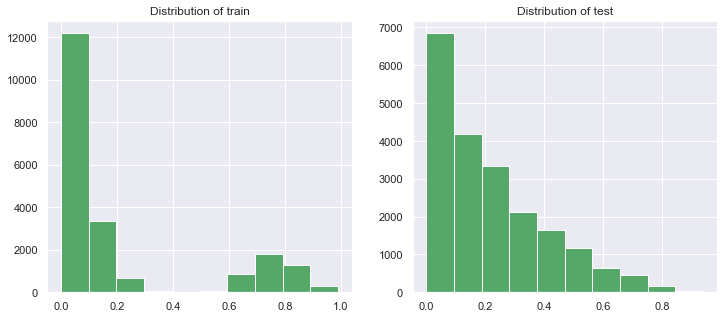

In [231]:
fig, ax = plt.subplots(1, 2)

train_pred_df['prob_default'].hist(figsize=(12,5),ax=ax[0],color='g')
test_pred_df['prob_default'].hist(figsize=(12,5),ax=ax[1],color='g')

ax[0].set_title('Distribution of train')
ax[1].set_title('Distribution of test')